In [145]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import optuna
import shap


In [146]:
# Importing Data

train = pd.read_csv("C:\\Users\\ERALP\\OneDrive\\Desktop\\Software Engineering\\Kaggle\Kaggle_Challenges\\Titanic - Machine Learning from Disaster\\Kaggle-Titanic\\train.csv")

test = pd.read_csv("C:\\Users\\ERALP\\OneDrive\\Desktop\\Software Engineering\\Kaggle\Kaggle_Challenges\\Titanic - Machine Learning from Disaster\\Kaggle-Titanic\\test.csv")

In [147]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [148]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [149]:
# Data Preprocessing

train.drop(["Name", "Ticket", "Cabin", "Fare"], axis = 1, inplace = True)
survived = train["Survived"]
train.drop(["Survived"], axis = 1, inplace = True)
train["Survived"] = survived
train.head()



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,male,22.0,1,0,S,0
1,2,1,female,38.0,1,0,C,1
2,3,3,female,26.0,0,0,S,1
3,4,1,female,35.0,1,0,S,1
4,5,3,male,35.0,0,0,S,0


In [150]:
test.drop(["Name", "Ticket", "Cabin", "Fare"], axis = 1, inplace = True)
test.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Embarked     889 non-null    object 
 7   Survived     891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [152]:
train["PassengerId"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [153]:
train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [154]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [155]:
train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [156]:
train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [157]:
train["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [158]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [159]:
train["Survived"].unique()

array([0, 1], dtype=int64)

In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [161]:
test["Age"].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [162]:
test["Pclass"].unique()

array([3, 2, 1], dtype=int64)

In [163]:
test["Sex"].unique()

array(['male', 'female'], dtype=object)

In [164]:
test["SibSp"].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [165]:
test["Parch"].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [166]:
test["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [167]:
train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,male,22.0,1,0,S,0
1,2,1,female,38.0,1,0,C,1
2,3,3,female,26.0,0,0,S,1
3,4,1,female,35.0,1,0,S,1
4,5,3,male,35.0,0,0,S,0
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,S,0
887,888,1,female,19.0,0,0,S,1
888,889,3,female,NaN,1,2,S,0
889,890,1,male,26.0,0,0,C,1


In [168]:
len(train[(train["Age"].isna())])

177

In [169]:
train[(train["Age"].isna())]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
5,6,3,male,NaN,0,0,Q,0
17,18,2,male,NaN,0,0,S,1
19,20,3,female,NaN,0,0,C,1
26,27,3,male,NaN,0,0,C,0
28,29,3,female,NaN,0,0,Q,1
...,...,...,...,...,...,...,...,...
859,860,3,male,NaN,0,0,C,0
863,864,3,female,NaN,8,2,S,0
868,869,3,male,NaN,0,0,S,0
878,879,3,male,NaN,0,0,S,0


In [170]:
train.loc[train["Age"].isna(), "Age"] = 0

In [171]:
train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,  0.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [172]:
len(train[(train["Embarked"].isna())])

2

In [173]:
train[(train["Embarked"].isna())]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
61,62,1,female,38.0,0,0,NaN,1
829,830,1,female,62.0,0,0,NaN,1


In [174]:
train.loc[train["Embarked"].isna(), "Embarked"] = 0

In [175]:
len(train[(train["Embarked"].isna())])

0

In [176]:
train["Embarked"].unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Embarked     891 non-null    object 
 7   Survived     891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [178]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [179]:
len(test[(test["Age"].isna())])

86

In [180]:
test[(test["Age"].isna())]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
10,902,3,male,NaN,0,0,S
22,914,1,female,NaN,0,0,S
29,921,3,male,NaN,2,0,C
33,925,3,female,NaN,1,2,S
36,928,3,female,NaN,0,0,S
...,...,...,...,...,...,...,...
408,1300,3,female,NaN,0,0,Q
410,1302,3,female,NaN,0,0,Q
413,1305,3,male,NaN,0,0,S
416,1308,3,male,NaN,0,0,S


In [181]:
test.loc[test["Age"].isna(), "Age"] = 0

In [182]:
len(test[(test["Age"].isna())])

0

In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [184]:
# Rechecking and Identifying Irregularities

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Embarked     891 non-null    object 
 7   Survived     891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [185]:
train["PassengerId"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [186]:
train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [187]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [188]:
train["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,  0.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [189]:
train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [190]:
train["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [191]:
train["Embarked"].unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [192]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Embarked     891 non-null    object 
 7   Survived     891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [193]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [194]:
X = train.drop(["Survived"], axis=1)
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,22.0,1,0,S
1,2,1,female,38.0,1,0,C
2,3,3,female,26.0,0,0,S
3,4,1,female,35.0,1,0,S
4,5,3,male,35.0,0,0,S


In [195]:
y = train["Survived"].copy()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [196]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,22.0,1,0,S
1,2,1,female,38.0,1,0,C
2,3,3,female,26.0,0,0,S
3,4,1,female,35.0,1,0,S
4,5,3,male,35.0,0,0,S


In [197]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [198]:
X_encoded = pd.get_dummies(X, columns=["Pclass","Sex", "Embarked" ])
X_encoded = X_encoded.drop(["Embarked_0"], axis = 1)
X_encoded.head()

,PassengerId,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,0,0,1,0,1,0,0,1
1,2,38.0,1,0,1,0,0,1,0,1,0,0
2,3,26.0,0,0,0,0,1,1,0,0,0,1
3,4,35.0,1,0,1,0,0,1,0,0,0,1
4,5,35.0,0,0,0,0,1,0,1,0,0,1


In [199]:
Test_encoded = pd.get_dummies(test, columns=["Pclass", "Sex", "Embarked"])
Test_encoded.head()

,PassengerId,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,0,0,1,0,1,0,1,0
1,893,47.0,1,0,0,0,1,1,0,0,0,1
2,894,62.0,0,0,0,1,0,0,1,0,1,0
3,895,27.0,0,0,0,0,1,0,1,0,0,1
4,896,22.0,1,1,0,0,1,1,0,0,0,1


In [200]:
# Splitting the Train Set into Train and Validation Sets

X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42, stratify=y)

In [201]:
clf_xgb = xgb.XGBClassifier(objective = "binary:logistic", random_state = 42)

clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

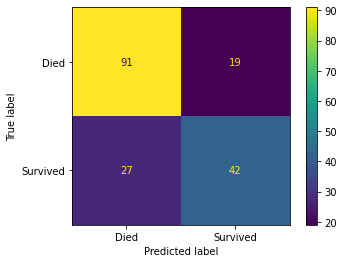

In [202]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_val, y_val, display_labels=["Died", "Survived"])

In [206]:
param_grid = {
    "max_depth": [3, 4, 5, 6],
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5],
    "gamma": [0.10, 0.25, 0.5, 1.0],
    "reg_lambda": [0, 1.0, 10.0, 100.0],
    "scale_pos_weight": [1, 3, 5]
}

optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = "binary:logistic", random_state = 42),
    param_grid = param_grid,
    scoring = "roc_auc",
    verbose = 2,
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
{'gamma': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'reg_lambda': 1.0, 'scale_pos_weight': 1}


In [207]:
clf_xgb = xgb.XGBClassifier(objective = "binary:logistic",
                            seed = 42,
                            gamma = 1.0,
                            learning_rate = 0.01,
                            max_depth = 5,
                            n_estimators = 50,
                            reg_lambda = 1.0, scale_pos_weight = 1
                            )

clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

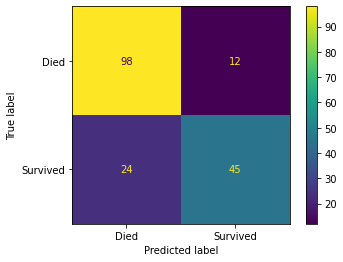

In [208]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_val, y_val, display_labels=["Died", "Survived"])

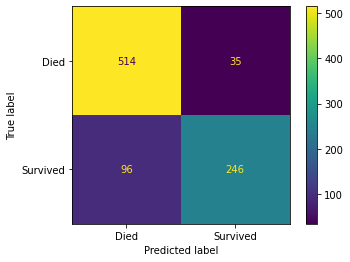

In [209]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_encoded, y, display_labels=["Died", "Survived"])

In [210]:
optimal_params.score(X_val, y_val)

0.7989459815546772

In [211]:
optimal_params.score(X_encoded, y)

0.8814351452401495

In [212]:
optimal_params.score(X_train, y_train)

0.9018039667242401

In [213]:
optimal_params.predict(Test_encoded)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

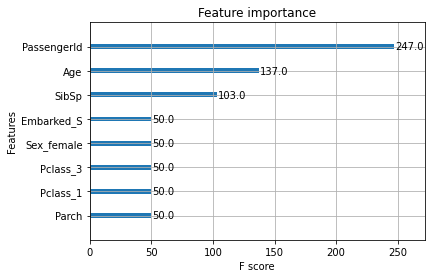

In [214]:
xgb.plot_importance(clf_xgb)

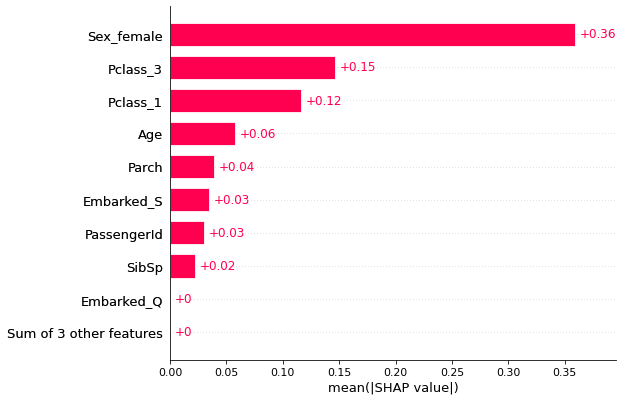

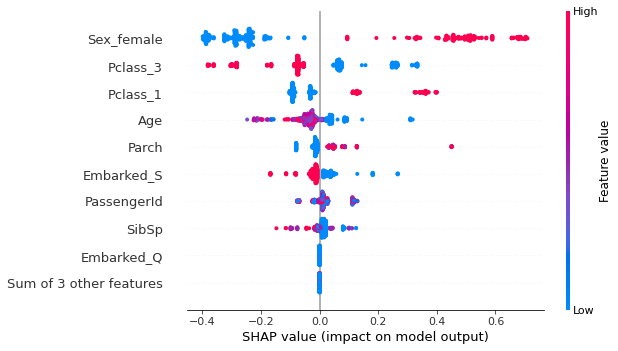

In [215]:
import shap


explainer = shap.Explainer(clf_xgb)
shap_values = explainer(Test_encoded)
shap.plots.bar(shap_values)

shap.plots.beeswarm(shap_values)

In [217]:

output = test["PassengerId"].copy()

result = pd.DataFrame(optimal_params.predict(Test_encoded), columns=["Survived"])

output = pd.concat([output, result], axis=1)

output.to_csv("submission2.csv", index=False)